We begin by reading in a few data files relevant to on-premise beer consumption in US states.

In [1]:
import pandas as pd

In [2]:
pop_by_state = pd.read_csv('file:///C:\Users\simserra\Documents\Population_by_State.csv')
pop_by_state.head()

,State,Population_2013
0,Alabama,4833996
1,Alaska,737259
2,Arizona,6634997
3,Arkansas,2958765
4,California,38431393


In [3]:
beer_by_state = pd.read_csv('file:///C:\Users\simserra\Documents\Gallons_Beer_by_State.csv')
beer_by_state.head()

,State,Gallons_2012
0,Alabama,107259201.0
1,Alaska,14971887.0
2,Arizona,139762885.5
3,Arkansas,57450393.0
4,California,703012527.0


In [4]:
on_prem_beer_by_state = pd.read_csv('file:///C:\Users\simserra\Documents\On_Premise_Beer_by_State.csv')
on_prem_beer_by_state.head()

,State,Pints_per_cap_2013
0,Alabama,10
1,Alaska,18
2,Arizona,28
3,Arkansas,11
4,California,21


In [5]:
GDP_per_cap_by_state = pd.read_csv('file:///C:\Users\simserra\Documents\GDP_per_cap_by_State.csv')
GDP_per_cap_by_state.head()

,State,GDP_per_cap_2013
0,District of Columbia,166870
1,Massachusetts,61769
2,New York,61185
3,Connecticut,63638
4,Alaska,70573


Next we convert volumes to liters and merge datasets. Then we compute what percent of beer was consumed on-premise.

In [6]:
gal_to_L = 3.78541
pint_to_L = 0.473176

beer_by_state['Liters'] = beer_by_state['Gallons_2012']*gal_to_L
on_prem_beer_by_state['Liters_per_cap'] = on_prem_beer_by_state['Pints_per_cap_2013']*pint_to_L

beer_combined = pop_by_state.merge(beer_by_state).merge(on_prem_beer_by_state).merge(GDP_per_cap_by_state)

beer_combined['On_premise_liters'] = beer_combined['Population_2013']*beer_combined['Liters_per_cap']
beer_combined = beer_combined.rename(columns={"Liters": "Total_Liters"})
beer_combined['On_prem_pct'] = (beer_combined['On_premise_liters']/beer_combined['Total_Liters'])*100
beer_combined

,State,Population_2013,Gallons_2012,Total_Liters,Pints_per_cap_2013,Liters_per_cap,GDP_per_cap_2013,On_premise_liters,On_prem_pct
0,Alabama,4833996,107259201.0,4.060201e+08,10,4.731760,36201,2.287331e+07,5.633542
1,Alaska,737259,14971887.0,5.667473e+07,18,8.517168,70573,6.279359e+06,11.079645
2,Arizona,6634997,139762885.5,5.290598e+08,28,13.248928,38257,8.790660e+07,16.615625
3,Arkansas,2958765,57450393.0,2.174733e+08,11,5.204936,35146,1.540018e+07,7.081413
4,California,38431393,703012527.0,2.661191e+09,21,9.936696,52099,3.818811e+08,14.350008
5,Colorado,5272086,114296143.5,4.326578e+08,44,20.819744,49285,1.097635e+08,25.369585
6,Connecticut,3599341,59341558.5,2.246321e+08,19,8.990344,63638,3.235931e+07,14.405470
7,Delaware,925240,22921794.0,8.676839e+07,29,13.722104,63793,1.269624e+07,14.632333
8,Florida,19600311,405763627.5,1.535982e+09,26,12.302576,37876,2.411343e+08,15.699036
9,Georgia,9994759,182555793.0,6.910485e+08,13,6.151288,42140,6.148064e+07,8.896718


Hawaii's on-prem percent is way too high. Something is wrong with the reporting of this state's numbers. Luckily the rest look good. We drop Hawaii.

In [7]:
beer_combined = beer_combined[beer_combined['State'] != 'Hawaii'].reset_index()
beer_combined

,index,State,Population_2013,Gallons_2012,Total_Liters,Pints_per_cap_2013,Liters_per_cap,GDP_per_cap_2013,On_premise_liters,On_prem_pct
0,0,Alabama,4833996,107259201.0,4.060201e+08,10,4.731760,36201,2.287331e+07,5.633542
1,1,Alaska,737259,14971887.0,5.667473e+07,18,8.517168,70573,6.279359e+06,11.079645
2,2,Arizona,6634997,139762885.5,5.290598e+08,28,13.248928,38257,8.790660e+07,16.615625
3,3,Arkansas,2958765,57450393.0,2.174733e+08,11,5.204936,35146,1.540018e+07,7.081413
4,4,California,38431393,703012527.0,2.661191e+09,21,9.936696,52099,3.818811e+08,14.350008
5,5,Colorado,5272086,114296143.5,4.326578e+08,44,20.819744,49285,1.097635e+08,25.369585
6,6,Connecticut,3599341,59341558.5,2.246321e+08,19,8.990344,63638,3.235931e+07,14.405470
7,7,Delaware,925240,22921794.0,8.676839e+07,29,13.722104,63793,1.269624e+07,14.632333
8,8,Florida,19600311,405763627.5,1.535982e+09,26,12.302576,37876,2.411343e+08,15.699036
9,9,Georgia,9994759,182555793.0,6.910485e+08,13,6.151288,42140,6.148064e+07,8.896718


In [100]:
quick_beer_stats = beer_combined[['State', 'Liters_per_cap', 'On_prem_pct']]
quick_beer_stats2 = quick_beer_stats.reset_index().sort_values(by = 'On_prem_pct', ascending = False)
quick_beer_stats2.head()

,index,State,Liters_per_cap,On_prem_pct
5,5,Colorado,20.819744,25.369585
36,36,Pennsylvania,18.453864,22.646108
21,21,Minnesota,16.561160,21.124180
35,35,Oregon,17.507512,20.418887
45,45,Washington,13.248928,19.230741


As outlined in the methodology, we want to use this on-prem beer data to estimate the effects of income per capita on on-prem beverage consumption. We will use the results as a proxy for on-prem coffee consumption as a function of income per capita. So, let's experiment with regression.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X_set1 = beer_combined[['GDP_per_cap_2013']]
Y_set1 = beer_combined[['On_prem_pct']]

beer_combined.plot.scatter(x = 'GDP_per_cap_2013', y = 'On_prem_pct')

This looks ok, though there is some evident heteroskedasticity. Let's try a log-log transformation.

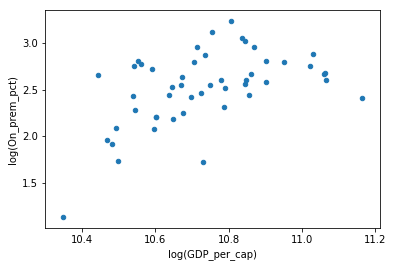

In [9]:
beer_combined['log(GDP_per_cap)'] = np.log(beer_combined['GDP_per_cap_2013'])
beer_combined['log(On_prem_pct)'] = np.log(beer_combined['On_prem_pct'])

X_set2 = beer_combined[['log(GDP_per_cap)']]
Y_set2 = beer_combined[['log(On_prem_pct)']]

beer_combined.plot.scatter(x = 'log(GDP_per_cap)', y = 'log(On_prem_pct)')

  Running setup.py install for seaborn: started
    Running setup.py install for seaborn: finished with status 'done'


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


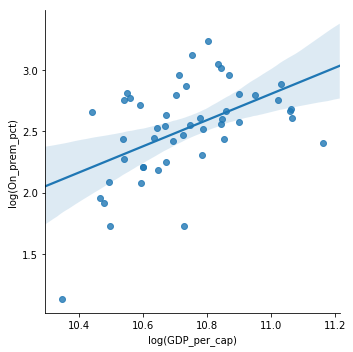

In [89]:
import sys
!{sys.executable} -m pip install seaborn

import seaborn as sbn

sbn.lmplot(x = 'log(GDP_per_cap)', y = 'log(On_prem_pct)', data = beer_combined, fit_reg = True)

Not perfect, but better. This appears to be an appropriate transformation and model in general. Let's calculate slope and R squared.

In [10]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_set2, Y_set2)

On_prem_fraction_pred = regr.predict(X_set2)

regr.coef_

array([[1.06943619]])

Our use of a logarithmic transformation in both variables enables us to interpret the derivative of the fitted line as representing the % change in the on-prem fraction in response to a 1% change in GDP per capita. Nifty!

In [11]:
# Calculate R2:

res_sq = (Y_set2-On_prem_fraction_pred)**2
tot_sq = (Y_set2)**2

R2 = 1 - res_sq.sum()/tot_sq.sum()
R2

log(On_prem_pct)    0.982484
dtype: float64

High R squared! Never a bad sign when only one independent variable is in use.

Now onto the coffee dataset.

In [12]:
coffee = pd.read_csv('file:///C:\Users\simserra\Documents\Coffee.csv')
coffee.head()

,country,coffee_per_cap
0,Finland,9.6
1,Norway,7.2
2,Netherlands,6.7
3,Slovenia,6.1
4,Austria,5.5


In [13]:
coffee['capitals'] = ['Helsinki, Finland', 'Oslo, Norway', 'Amsterdam, Netherlands', 'Ljubljana, Slovenia', 
            'Vienna, Austria', 'Belgrade, Serbia', 'Copenhagen, Denmark', 'Berlin, Germany',
           'Brussels, Belgium', 'Brasilia, Brazil', 'Sarajevo, Bosnia-Herzegovina', 'Tallinn, Estonia',
           'Bern, Switzerland', 'Zagreb, Croatia', 'Santo Domingo, Dominican Republic', 'San Jose, Costa Rica',
           'Skopje, Macedonia', 'Rome, Italy', 'Ottawa, Canada', 'Vilnius, Lithuania', 'Paris, France',
           'Washington DC, USA', 'Warsaw, Poland', 'Budapest, Hungary', 'Madrid, Spain', 'Seoul, South Korea',
           'Algiers, Algeria', 'Canberra, Australia', 'Lisbon, Portugal', 'Bratislava, Slovakia',
           'Riga, Latvia', 'Athens, Greece', 'Prague, Czech Republic', 'Sofia, Bulgaria', 'Tunis, Tunisia',
           'Singapore', 'Guatemala City, Guatemala', 'Bucharest, Romania', 'Tel-Aviv, Israel',
           'London, United Kingdom', 'Bangkok, Thailand', 'Caracas, Venezuela', 'Tokyo, Japan',
           'Bogota, Colombia', 'Kuala Lumpur, Malaysia', 'Hong Kong', 'Wellington, New Zealand',
           'Tbilisi, Georgia', 'Manila, Philippines']
coffee.head()

,country,coffee_per_cap,capitals
0,Finland,9.6,"Helsinki, Finland"
1,Norway,7.2,"Oslo, Norway"
2,Netherlands,6.7,"Amsterdam, Netherlands"
3,Slovenia,6.1,"Ljubljana, Slovenia"
4,Austria,5.5,"Vienna, Austria"


In [14]:
coffee['Latitude'] = 0.0
coffee['Longitude'] = 0.0

In [15]:
coffee_subset = coffee[['country','coffee_per_cap']]
coffee_subset = coffee_subset.set_index('country')

Text(0.5,1,'Per Capita Coffee Consumption by Country')

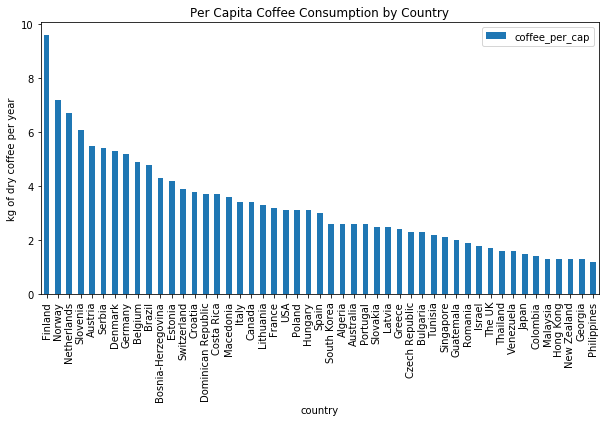

In [16]:
coffee_figure = coffee_subset.plot(kind = 'bar', width = 0.5, figsize = (10,5))
coffee_figure.set_ylabel("kg of dry coffee per year")
coffee_figure.set_title("Per Capita Coffee Consumption by Country")

We now want to collect all of the coordinates of the capital cities for the countries in the dataset.

In [17]:
import sys
!{sys.executable} -m pip install geocoder
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "espresso_man", timeout = 3)

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
for i in range(len(coffee.capitals)):
    address = coffee['capitals'][i]
    location = geolocator.geocode(address)
    coffee['Latitude'][i] = location.latitude
    coffee['Longitude'][i] = location.longitude

C:\Python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
coffee.head()

,country,coffee_per_cap,capitals,Latitude,Longitude
0,Finland,9.6,"Helsinki, Finland",60.171320,24.941457
1,Norway,7.2,"Oslo, Norway",59.913330,10.738970
2,Netherlands,6.7,"Amsterdam, Netherlands",52.374540,4.897976
3,Slovenia,6.1,"Ljubljana, Slovenia",46.049815,14.506782
4,Austria,5.5,"Vienna, Austria",48.208354,16.372504


Now we are ready to use Foursquare to identify the concentration of cafes in each city. Let's take a quick look at Helsinki:

In [20]:
CLIENT_ID = 'WSTQSVLUBK1ZYRI3WDZZRDRN0QQ2DCANTIKY0ZHCGO3JEQTB'
CLIENT_SECRET = '2RJIAOH5IY0I10P1B5IMBI3U2QHCA5HJMSVEQ2P4DWL55T4B'
VERSION = '20180605'

In [21]:
coffee.loc[0, 'capitals']

'Helsinki, Finland'

In [22]:
city_latitude = coffee.loc[0,'Latitude']
city_longitude = coffee.loc[0, 'Longitude']
city_name = coffee.loc[0, 'capitals']
coffee.head()

,country,coffee_per_cap,capitals,Latitude,Longitude
0,Finland,9.6,"Helsinki, Finland",60.171320,24.941457
1,Norway,7.2,"Oslo, Norway",59.913330,10.738970
2,Netherlands,6.7,"Amsterdam, Netherlands",52.374540,4.897976
3,Slovenia,6.1,"Ljubljana, Slovenia",46.049815,14.506782
4,Austria,5.5,"Vienna, Austria",48.208354,16.372504


In [23]:
CLIENT_ID = 'WSTQSVLUBK1ZYRI3WDZZRDRN0QQ2DCANTIKY0ZHCGO3JEQTB'
CLIENT_SECRET = '2RJIAOH5IY0I10P1B5IMBI3U2QHCA5HJMSVEQ2P4DWL55T4B'
VERSION = '20180605'

LIMIT = 10000
radius = 5000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&;limit={}'.format(
               CLIENT_ID, CLIENT_SECRET, VERSION, city_latitude, city_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=WSTQSVLUBK1ZYRI3WDZZRDRN0QQ2DCANTIKY0ZHCGO3JEQTB&client_secret=2RJIAOH5IY0I10P1B5IMBI3U2QHCA5HJMSVEQ2P4DWL55T4B&v=20180605&ll=60.1713198,24.9414566&radius=5000&;limit=10000'

In [24]:
import requests
from pandas.io.json import json_normalize

In [25]:
results = requests.get(url).json()
results

{u'meta': {u'code': 200, u'requestId': u'5c8fd94bf594df7cde78e0ea'},
 u'response': {u'groups': [{u'items': [{u'reasons': {u'count': 0,
       u'items': [{u'reasonName': u'globalInteractionReason',
         u'summary': u'This spot is popular',
         u'type': u'general'}]},
      u'referralId': u'e-0-4af1c9e2f964a52031e321e3-0',
      u'venue': {u'categories': [{u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          u'suffix': u'.png'},
         u'id': u'4bf58dd8d48988d1e0931735',
         u'name': u'Coffee Shop',
         u'pluralName': u'Coffee Shops',
         u'primary': True,
         u'shortName': u'Coffee Shop'}],
       u'id': u'4af1c9e2f964a52031e321e3',
       u'location': {u'address': u'Aleksanterinkatu 50',
        u'cc': u'FI',
        u'city': u'Helsinki',
        u'country': u'Suomi',
        u'distance': 299,
        u'formattedAddress': [u'Aleksanterinkatu 50',
         u'00100 Helsinki',
         u'Suomi'],
        u'labeledLatLngs

Here we need to borrow some functions from the last Lab:

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis = 1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,La Torrefazione,Coffee Shop,60.168901,24.943817
1,Yrjönkadun uimahalli,Pool,60.168234,24.939272
2,Pien Shop & Bar,Beer Store,60.169673,24.944526
3,Kiasma,Art Museum,60.171652,24.936537
4,Amos Rex,Art Museum,60.170697,24.936850


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius = 5000):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&;limit={}'.format(
               CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], 
                             v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 'City Latitude', 'City Longitude',
                                'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
        
    return(nearby_venues)
        

Now we take a look at all of the cities' surroundings.

In [29]:
Global_venues = getNearbyVenues(names = coffee['capitals'], latitudes = coffee['Latitude'], longitudes = coffee['Longitude'])

Helsinki, Finland
Oslo, Norway
Amsterdam, Netherlands
Ljubljana, Slovenia
Vienna, Austria
Belgrade, Serbia
Copenhagen, Denmark
Berlin, Germany
Brussels, Belgium
Brasilia, Brazil
Sarajevo, Bosnia-Herzegovina
Tallinn, Estonia
Bern, Switzerland
Zagreb, Croatia
Santo Domingo, Dominican Republic
San Jose, Costa Rica
Skopje, Macedonia
Rome, Italy
Ottawa, Canada
Vilnius, Lithuania
Paris, France
Washington DC, USA
Warsaw, Poland
Budapest, Hungary
Madrid, Spain
Seoul, South Korea
Algiers, Algeria
Canberra, Australia
Lisbon, Portugal
Bratislava, Slovakia
Riga, Latvia
Athens, Greece
Prague, Czech Republic
Sofia, Bulgaria
Tunis, Tunisia
Singapore
Guatemala City, Guatemala
Bucharest, Romania
Tel-Aviv, Israel
London, United Kingdom
Bangkok, Thailand
Caracas, Venezuela
Tokyo, Japan
Bogota, Colombia
Kuala Lumpur, Malaysia
Hong Kong
Wellington, New Zealand
Tbilisi, Georgia
Manila, Philippines


In [30]:
Global_venues['Venue Category'] = Global_venues['Venue Category'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [31]:
Venue_Counts = Global_venues.groupby('City').count()
Venue_Counts = pd.DataFrame(Venue_Counts)
Venue_Counts = Venue_Counts.reset_index()
Venue_Counts.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Algiers, Algeria",2,2,2,2,2,2
1,"Amsterdam, Netherlands",30,30,30,30,30,30
2,"Athens, Greece",30,30,30,30,30,30
3,"Bangkok, Thailand",30,30,30,30,30,30
4,"Belgrade, Serbia",30,30,30,30,30,30


In [32]:
Global_onehot = pd.get_dummies(Global_venues[['Venue Category']],prefix="",prefix_sep="")
Global_onehot['City'] = Global_venues['City']

fixed_columns = [Global_onehot.columns[-1]] + list(Global_onehot.columns[:-1])
Global_onehot = Global_onehot[fixed_columns]

Global_onehot.columns.tolist()

['City',
 u'Accessories Store',
 u'American Restaurant',
 u'Antique Shop',
 u'Argentinian Restaurant',
 u'Art Gallery',
 u'Art Museum',
 u'Arts & Crafts Store',
 u'Asian Restaurant',
 u'Athletics & Sports',
 u'Austrian Restaurant',
 u'BBQ Joint',
 u'Bakery',
 u'Bar',
 u'Bathing Area',
 u'Bed & Breakfast',
 u'Beer Bar',
 u'Beer Garden',
 u'Beer Store',
 u'Belgian Restaurant',
 u'Bistro',
 u'Bookstore',
 u'Botanical Garden',
 u'Boutique',
 u'Brazilian Restaurant',
 u'Breakfast Spot',
 u'Brewery',
 u'Bridge',
 u'Burger Joint',
 u'Burrito Place',
 u'Butcher',
 u'Cafe',
 u'Camera Store',
 u'Candy Store',
 u'Cantonese Restaurant',
 u'Capitol Building',
 u'Casino',
 u'Castle',
 u'Cheese Shop',
 u'Chinese Restaurant',
 u'Chocolate Shop',
 u'Church',
 u'City Hall',
 u'Climbing Gym',
 u'Clothing Store',
 u'Cocktail Bar',
 u'Coffee Shop',
 u'College Arts Building',
 u'College Quad',
 u'Comedy Club',
 u'Comfort Food Restaurant',
 u'Comic Shop',
 u'Concert Hall',
 u'Convenience Store',
 u'Cosmetics

We notice that cafes seem to go by many different names: coffee shops, cafes, Kafenio, etc. So we include all such candidates. 

In [33]:
Global_venues.loc[(Global_venues['Venue Category'] == 'Coffee Shop') | (Global_venues['Venue Category'] == 'Gaming Cafe') | (Global_venues['Venue Category'] == 'Donut Shop') | (Global_venues['Venue Category'] == 'Kafenio') | (Global_venues['Venue Category'] == 'Cafe') | (Global_venues['Venue Category'] == 'Dessert Shop') | (Global_venues['Venue Category'] == 'Breakfast Spot') | (Global_venues['Venue Category'] == 'Shopping Mall') | (Global_venues['Venue Category'] == 'Shopping Plaza')]

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Helsinki, Finland",60.171320,24.941457,La Torrefazione,60.168901,24.943817,Coffee Shop
10,"Helsinki, Finland",60.171320,24.941457,Fratello Torrefazione,60.169775,24.947886,Coffee Shop
12,"Helsinki, Finland",60.171320,24.941457,La Torrefazione,60.170721,24.936158,Cafe
34,"Oslo, Norway",59.913330,10.738970,Fuglen,59.917058,10.739780,Coffee Shop
35,"Oslo, Norway",59.913330,10.738970,Stockfleths,59.913665,10.740923,Coffee Shop
47,"Oslo, Norway",59.913330,10.738970,Stockfleths,59.910570,10.746644,Coffee Shop
60,"Amsterdam, Netherlands",52.374540,4.897976,De Koffieschenkerij,52.374043,4.898427,Coffee Shop
61,"Amsterdam, Netherlands",52.374540,4.897976,Omelegg - City Centre,52.376060,4.899802,Breakfast Spot
86,"Amsterdam, Netherlands",52.374540,4.897976,Gartine,52.369157,4.891615,Breakfast Spot
100,"Ljubljana, Slovenia",46.049815,14.506782,Pritličje,46.049850,14.506747,Cafe


In [34]:
Cafes = Global_venues.loc[(Global_venues['Venue Category'] == 'Coffee Shop') | (Global_venues['Venue Category'] == 'Gaming Cafe') | (Global_venues['Venue Category'] == 'Donut Shop') | (Global_venues['Venue Category'] == 'Kafenio') | (Global_venues['Venue Category'] == 'Cafe') | (Global_venues['Venue Category'] == 'Dessert Shop') | (Global_venues['Venue Category'] == 'Breakfast Spot') | (Global_venues['Venue Category'] == 'Shopping Mall') | (Global_venues['Venue Category'] == 'Shopping Plaza')]

We would like to see the counts of coffee venues in each city.

In [35]:
Cafes_by_City = Cafes[['City', 'Venue Category']].groupby('City').count()

In [36]:
Cafes_by_City

,Venue Category
City,
"Algiers, Algeria",1
"Amsterdam, Netherlands",3
"Athens, Greece",7
"Bangkok, Thailand",6
"Belgrade, Serbia",5
"Berlin, Germany",2
"Bern, Switzerland",3
"Bogota, Colombia",5
"Bratislava, Slovakia",3


In [37]:
Cafes_by_City = Cafes_by_City.rename(columns = {'Venue Category': 'Cafe Count'})
Cafes_by_City = pd.DataFrame(Cafes_by_City)
Cafes_by_City = Cafes_by_City.reset_index()
Cafes_by_City.head()

,City,Cafe Count
0,"Algiers, Algeria",1
1,"Amsterdam, Netherlands",3
2,"Athens, Greece",7
3,"Bangkok, Thailand",6
4,"Belgrade, Serbia",5


Text(0.5,1,'Cafes per 30 Locations')

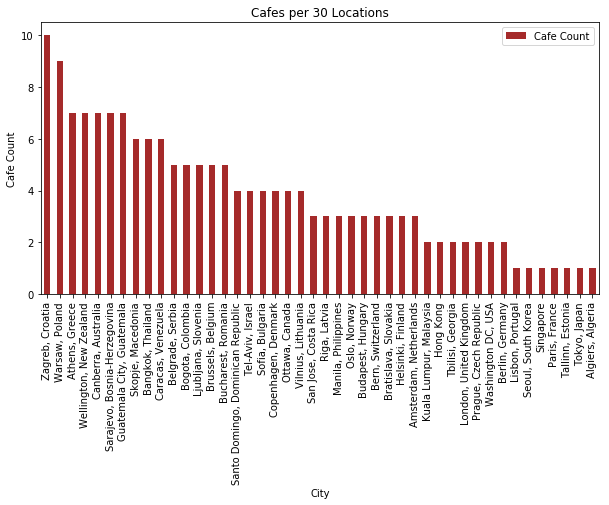

In [87]:
cafe_figure = Cafes_by_City.set_index('City').sort_values(by = 'Cafe Count', ascending = False).plot(kind = 'bar', width = 0.5, figsize = (10,5), color = 'brown')
cafe_figure.set_ylabel("Cafe Count")
cafe_figure.set_title("Cafes per 30 Locations")

Text(0,0.5,'Frequency of Count')

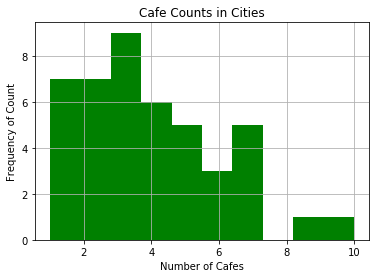

In [108]:
Cafe_hist = Cafes_by_City['Cafe Count'].hist(bins=10, color = 'g')
Cafe_hist.set_title("Cafe Counts in Cities")
Cafe_hist.set_xlabel("Number of Cafes")
Cafe_hist.set_ylabel("Frequency of Count")


In [39]:
Location_Cafe_Merged = pd.merge(Venue_Counts, Cafes_by_City, how = 'left', on = 'City')
Location_Cafe_Merged

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cafe Count
0,"Algiers, Algeria",2,2,2,2,2,2,1.0
1,"Amsterdam, Netherlands",30,30,30,30,30,30,3.0
2,"Athens, Greece",30,30,30,30,30,30,7.0
3,"Bangkok, Thailand",30,30,30,30,30,30,6.0
4,"Belgrade, Serbia",30,30,30,30,30,30,5.0
5,"Berlin, Germany",30,30,30,30,30,30,2.0
6,"Bern, Switzerland",30,30,30,30,30,30,3.0
7,"Bogota, Colombia",30,30,30,30,30,30,5.0
8,"Bratislava, Slovakia",30,30,30,30,30,30,3.0
9,"Brussels, Belgium",30,30,30,30,30,30,5.0


From this, we can see that Madrid, Rome, and Vienna don't have any cafes. This is obviously false and since we don't want to misrepresent the coffee culture in these cities, we will exclude them from our analysis. Clearly, Foursquare's location extractions don't accurately represent points of sales for coffee in these cities. Additionally, we will drop Algiers as it only has 2 venues and thus does not have a suffiecient sample size to allow us to draw useful conclusions.

In [40]:
Cafe_Cities = Location_Cafe_Merged.set_index('City')
Cafe_Cities = Cafe_Cities.drop(index = 'Madrid, Spain')
Cafe_Cities = Cafe_Cities.drop(index = 'Rome, Italy')
Cafe_Cities = Cafe_Cities.drop(index = 'Vienna, Austria')
Cafe_Cities = Cafe_Cities.drop(index = 'Algiers, Algeria')
Cafe_Cities

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cafe Count
City,,,,,,,
"Amsterdam, Netherlands",30,30,30,30,30,30,3.0
"Athens, Greece",30,30,30,30,30,30,7.0
"Bangkok, Thailand",30,30,30,30,30,30,6.0
"Belgrade, Serbia",30,30,30,30,30,30,5.0
"Berlin, Germany",30,30,30,30,30,30,2.0
"Bern, Switzerland",30,30,30,30,30,30,3.0
"Bogota, Colombia",30,30,30,30,30,30,5.0
"Bratislava, Slovakia",30,30,30,30,30,30,3.0
"Brussels, Belgium",30,30,30,30,30,30,5.0


Unfortunately, Foursquare does not necessarily give us venues in order of proximity to the coordinates specified. It appears to be more of a random sample with an upper bound of 30 venues... at least for the free version. So we will make the following adjustment: We will assume that locations are proportional to population. So 30 locations in London and 30 locations in Warsaw would represent essentially the same population. This means that we no longer have to worry about population density. Instead, we just need to multiply cafe counts by per-capita coffee consumption in respective countries and then rank-order these products over our country list. The reason we can make this simplification is that we are only worried about the relative profitability of opening a new shop somewhere. Some of the following cells have been greened-out as they no longer apply.

In [41]:
# pop_dens = pd.read_csv('C:\Users\simserra\Documents\Pop_density.csv')
# pop_dens.head()

In [42]:
# cafe_capita = pop_dens.merge(Cafes_by_City)
# cafe_capita.head()

In [43]:
# Next we compute cafes per square kilometer, bring in population density (pop per square kilometer) and use these two values to compute population per cafe. Bringing in average coffee consumption per year in each country, we can then compute how much coffee a cafe in each city would sell in a year. This is assuming that all coffee is bought in shops (on-premise), which of course is incorrect. So we bring in the results of our regression on beer to determine the on/off premise consumption splits for each city based on their country's GDP per capita compared to the US split from 2004 of 25% on-premise, 75% off-premise, which we got from researching. We then apply this fraction to our coffee per cafe per year number mentioned in the second sentence.

In [44]:
# import math

In [45]:
# area_covered = (radius**2)*math.pi

In [46]:
# cafe_capita['population_covered'] = cafe_capita['Ppl_per_sqkm']*area_covered

In [47]:
# coffee.head()

In [48]:
# cafe_capita.head()

In [49]:
# consumption = pd.merge(cafe_capita, coffee, how = 'left', right_on = 'capitals', left_on = 'City')

In [50]:
# consumption = consumption[['City', 'country', 'Cafe Count', 'population_covered', 'coffee_per_cap']]
# consumption['total_consumption'] = consumption['population_covered']*consumption['coffee_per_cap']
# consumption.head()

In [51]:
Cafe_Cities_Consumption = pd.merge(Cafe_Cities, coffee, how = 'inner', left_on = 'City', right_on = 'capitals')
Cafe_Cities_Consumption = Cafe_Cities_Consumption[['capitals', 'country', 'Cafe Count', 'coffee_per_cap']]
Cafe_Cities_Consumption['consumption_per_cafe'] = Cafe_Cities_Consumption['coffee_per_cap']/Cafe_Cities_Consumption['Cafe Count']
Cafe_Cities_Consumption

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe
0,"Amsterdam, Netherlands",Netherlands,3.0,6.7,2.233333
1,"Athens, Greece",Greece,7.0,2.4,0.342857
2,"Bangkok, Thailand",Thailand,6.0,1.6,0.266667
3,"Belgrade, Serbia",Serbia,5.0,5.4,1.080000
4,"Berlin, Germany",Germany,2.0,5.2,2.600000
5,"Bern, Switzerland",Switzerland,3.0,3.9,1.300000
6,"Bogota, Colombia",Colombia,5.0,1.4,0.280000
7,"Bratislava, Slovakia",Slovakia,3.0,2.5,0.833333
8,"Brussels, Belgium",Belgium,5.0,4.9,0.980000
9,"Bucharest, Romania",Romania,5.0,1.9,0.380000


In [52]:
Cafe_Cities_Consumption = Cafe_Cities_Consumption.sort_values(by = 'consumption_per_cafe', ascending = False)
Cafe_Cities_Consumption

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe
34,"Tallinn, Estonia",Estonia,1.0,4.2,4.200000
24,"Paris, France",France,1.0,3.2,3.200000
15,"Helsinki, Finland",Finland,3.0,9.6,3.200000
30,"Seoul, South Korea",South Korea,1.0,2.6,2.600000
4,"Berlin, Germany",Germany,2.0,5.2,2.600000
18,"Lisbon, Portugal",Portugal,1.0,2.6,2.600000
22,"Oslo, Norway",Norway,3.0,7.2,2.400000
0,"Amsterdam, Netherlands",Netherlands,3.0,6.7,2.233333
31,Singapore,Singapore,1.0,2.1,2.100000
40,"Washington DC, USA",USA,2.0,3.1,1.550000


In [53]:
GDP_per_cap_ctry = pd.read_csv('C:\Users\simserra\Documents\GDP_per_cap_by_Country.csv')
GDP_per_cap_ctry.head()

,country,GDP_cap_PPP,GDP_cap_Nom
0,Qatar,124927,61024
1,Macau,114430,77111
2,Luxembourg,109192,105863
3,Singapore,90531,57713
4,Brunei,76743,28278


In [54]:
Cafe_Cities_Consumption = Cafe_Cities_Consumption.merge(GDP_per_cap_ctry)
Cafe_Cities_Consumption.head()

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe,GDP_cap_PPP,GDP_cap_Nom
0,"Tallinn, Estonia",Estonia,1.0,4.2,4.2,31473,19735
1,"Paris, France",France,1.0,3.2,3.2,43550,39932
2,"Helsinki, Finland",Finland,3.0,9.6,3.2,44050,45927
3,"Berlin, Germany",Germany,2.0,5.2,2.6,50206,44769
4,"Lisbon, Portugal",Portugal,1.0,2.6,2.6,30258,21158


In [80]:
GDP_rank = pd.DataFrame(Cafe_Cities_Consumption[['country','GDP_cap_PPP']].sort_values(by = 'GDP_cap_PPP', ascending = False))

In [110]:
GDP_top_5 = GDP_rank.head().set_index('country')
GDP_top_5

,GDP_cap_PPP
country,
Singapore,90531
Norway,70590
Switzerland,61360
Hong Kong,61016
Netherlands,53582


Text(0,0.5,'Per capita GDP PPP')

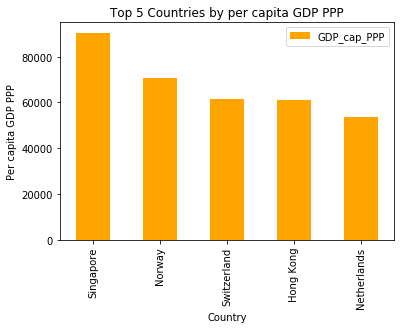

In [109]:
GDP_top_5_figure = GDP_top_5.plot(kind = 'bar', color = 'orange')
GDP_top_5_figure.set_title("Top 5 Countries by per capita GDP PPP")
GDP_top_5_figure.set_xlabel("Country")
GDP_top_5_figure.set_ylabel("Per capita GDP PPP")

Now we want to bring in the results of our regression:

In [55]:
US_on_prem = 0.25
US_off_prem = 1 - US_on_prem
GDP_cap_US_2004_ref = 41922

In [56]:
gdp_onprem_slope = float(regr.coef_)

In [57]:
Cafe_Cities_Consumption['gdp_wrt_US_2004'] = (Cafe_Cities_Consumption['GDP_cap_PPP']/GDP_cap_US_2004_ref-1)*100
Cafe_Cities_Consumption.head()

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe,GDP_cap_PPP,GDP_cap_Nom,gdp_wrt_US_2004
0,"Tallinn, Estonia",Estonia,1.0,4.2,4.2,31473,19735,-24.924860
1,"Paris, France",France,1.0,3.2,3.2,43550,39932,3.883403
2,"Helsinki, Finland",Finland,3.0,9.6,3.2,44050,45927,5.076094
3,"Berlin, Germany",Germany,2.0,5.2,2.6,50206,44769,19.760508
4,"Lisbon, Portugal",Portugal,1.0,2.6,2.6,30258,21158,-27.823100


In [58]:
Cafe_Cities_Consumption['on_prem_fraction'] = US_on_prem*(100 + Cafe_Cities_Consumption['gdp_wrt_US_2004']*gdp_onprem_slope)

In [59]:
Cafe_Cities_Consumption.head()

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe,GDP_cap_PPP,GDP_cap_Nom,gdp_wrt_US_2004,on_prem_fraction
0,"Tallinn, Estonia",Estonia,1.0,4.2,4.2,31473,19735,-24.924860,18.336113
1,"Paris, France",France,1.0,3.2,3.2,43550,39932,3.883403,26.038263
2,"Helsinki, Finland",Finland,3.0,9.6,3.2,44050,45927,5.076094,26.357140
3,"Berlin, Germany",Germany,2.0,5.2,2.6,50206,44769,19.760508,30.283150
4,"Lisbon, Portugal",Portugal,1.0,2.6,2.6,30258,21158,-27.823100,17.561242


In [60]:
Cafe_Cities_Consumption['adjusted_coffee_per_cafe'] = Cafe_Cities_Consumption['consumption_per_cafe']*Cafe_Cities_Consumption['on_prem_fraction']*0.01
Cafe_Cities_Consumption = Cafe_Cities_Consumption.sort_values(by = 'adjusted_coffee_per_cafe', ascending = False)
Cafe_Cities_Consumption.head()

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe,GDP_cap_PPP,GDP_cap_Nom,gdp_wrt_US_2004,on_prem_fraction,adjusted_coffee_per_cafe
7,Singapore,Singapore,1.0,2.1,2.1,90531,57713,115.951052,56.000563,1.176012
5,"Oslo, Norway",Norway,3.0,7.2,2.4,70590,75389,68.384142,43.283119,1.038795
2,"Helsinki, Finland",Finland,3.0,9.6,3.2,44050,45927,5.076094,26.357140,0.843428
1,"Paris, France",France,1.0,3.2,3.2,43550,39932,3.883403,26.038263,0.833224
3,"Berlin, Germany",Germany,2.0,5.2,2.6,50206,44769,19.760508,30.283150,0.787362


In [61]:
max_gdp = Cafe_Cities_Consumption['GDP_cap_PPP'].max()

Now adjust for pricing in different countries

In [62]:
Cafe_Cities_Consumption['indexed_gdp'] = Cafe_Cities_Consumption['GDP_cap_PPP']/max_gdp

In [63]:
Cafe_Cities_Consumption['relative_sales'] = Cafe_Cities_Consumption['adjusted_coffee_per_cafe']*Cafe_Cities_Consumption['indexed_gdp']

In [64]:
Cafe_Cities_Consumption = Cafe_Cities_Consumption.sort_values(by = ['relative_sales'], ascending = False)
Cafe_Cities_Consumption.head()

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe,GDP_cap_PPP,GDP_cap_Nom,gdp_wrt_US_2004,on_prem_fraction,adjusted_coffee_per_cafe,indexed_gdp,relative_sales
7,Singapore,Singapore,1.0,2.1,2.100000,90531,57713,115.951052,56.000563,1.176012,1.000000,1.176012
5,"Oslo, Norway",Norway,3.0,7.2,2.400000,70590,75389,68.384142,43.283119,1.038795,0.779733,0.809983
3,"Berlin, Germany",Germany,2.0,5.2,2.600000,50206,44769,19.760508,30.283150,0.787362,0.554572,0.436649
6,"Amsterdam, Netherlands",Netherlands,3.0,6.7,2.233333,53582,48555,27.813559,32.436207,0.724409,0.591864,0.428751
2,"Helsinki, Finland",Finland,3.0,9.6,3.200000,44050,45927,5.076094,26.357140,0.843428,0.486574,0.410390


In [65]:
max_sales = Cafe_Cities_Consumption['relative_sales'].max()
Cafe_Cities_Consumption['Singapore_index'] = Cafe_Cities_Consumption['relative_sales']/max_sales
Cafe_Cities_Consumption = Cafe_Cities_Consumption.sort_values(by = ['Singapore_index'], ascending = False)
Cafe_Cities_Consumption.head(15)

,capitals,country,Cafe Count,coffee_per_cap,consumption_per_cafe,GDP_cap_PPP,GDP_cap_Nom,gdp_wrt_US_2004,on_prem_fraction,adjusted_coffee_per_cafe,indexed_gdp,relative_sales,Singapore_index
7,Singapore,Singapore,1.0,2.1,2.100000,90531,57713,115.951052,56.000563,1.176012,1.000000,1.176012,1.000000
5,"Oslo, Norway",Norway,3.0,7.2,2.400000,70590,75389,68.384142,43.283119,1.038795,0.779733,0.809983,0.688754
3,"Berlin, Germany",Germany,2.0,5.2,2.600000,50206,44769,19.760508,30.283150,0.787362,0.554572,0.436649,0.371297
6,"Amsterdam, Netherlands",Netherlands,3.0,6.7,2.233333,53582,48555,27.813559,32.436207,0.724409,0.591864,0.428751,0.364581
2,"Helsinki, Finland",Finland,3.0,9.6,3.200000,44050,45927,5.076094,26.357140,0.843428,0.486574,0.410390,0.348968
1,"Paris, France",France,1.0,3.2,3.200000,43550,39932,3.883403,26.038263,0.833224,0.481051,0.400823,0.340833
10,"Bern, Switzerland",Switzerland,3.0,3.9,1.300000,61360,80637,46.367063,37.396654,0.486156,0.677779,0.329507,0.280190
0,"Tallinn, Estonia",Estonia,1.0,4.2,4.200000,31473,19735,-24.924860,18.336113,0.770117,0.347649,0.267730,0.227659
9,"Copenhagen, Denmark",Denmark,4.0,5.3,1.325000,49613,56630,18.345976,29.904963,0.396241,0.548022,0.217149,0.184648
8,"Tokyo, Japan",Japan,1.0,1.5,1.500000,42659,38448,1.758027,25.470024,0.382050,0.471209,0.180025,0.153081


Text(0.5,1,'Per Capita Coffee Consumption by Country')

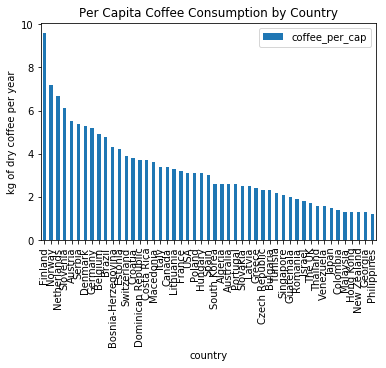

In [66]:
coffee_figure = coffee_subset.plot(kind = 'bar')
coffee_figure.set_ylabel("kg of dry coffee per year")
coffee_figure.set_title("Per Capita Coffee Consumption by Country")

Text(0.5,1,'Relative Cafe Sales by Country')

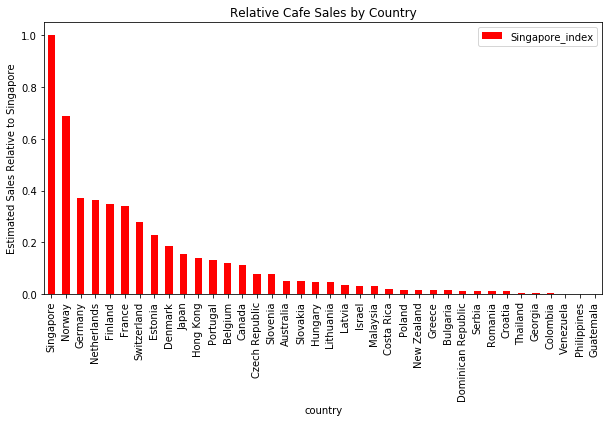

In [111]:
Cafe_Cities_Consumption_subset = Cafe_Cities_Consumption[['country','Singapore_index']]
Cafe_Cities_Consumption_subset = Cafe_Cities_Consumption_subset.set_index('country')
Cafe_Cities_Consumption_subset_figure = Cafe_Cities_Consumption_subset.plot(kind = 'bar', color = 'r', figsize = (10,5))
Cafe_Cities_Consumption_subset_figure.set_ylabel('Estimated Sales Relative to Singapore')
Cafe_Cities_Consumption_subset_figure.set_title('Relative Cafe Sales by Country')

So there it is! After adjusting for GDP per capita discrepancies that may result in differences in pricing, we see that SINGAPORE is our winner for the best opportunity to open up a new cafe! Northern European countries round out the top 5. Note that the values in the Cafe_Cities_Consumption DataFrame yield RELATIVE results since - among other reasons - we were not able to obtain precise data via Foursquare. But these relative figures suffice to show the most profitable market, if not a real estimate of revenue.

As a follow-up, we'd like to provide a prospective on other countries that may end up being as good of an opportunity as Singapore in the future. To do this, we do a cluster analysis based on types of venues in the 5 km radius in each city. Countries in Singapore's cluster are likely trending toward the success of Singapore with respect to providing a good location for a coffee shop.

In [68]:
Global_onehot.head()

,City,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Yoshoku Restaurant,Zoo
0,"Helsinki, Finland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Helsinki, Finland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Helsinki, Finland",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Helsinki, Finland",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Helsinki, Finland",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Global_onehot.shape

(1382, 231)

In [70]:
Global_grouped = Global_onehot.groupby('City').mean().reset_index()
Global_grouped.head()

,City,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Yoshoku Restaurant,Zoo
0,"Algiers, Algeria",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,"Amsterdam, Netherlands",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,"Athens, Greece",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.0
3,"Bangkok, Thailand",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Belgrade, Serbia",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
num_top_venues = 5

for city in Global_grouped['City']:
    print('City: ' + city)
    temp = Global_grouped[Global_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop=True).head(num_top_venues))
    print('\n')

City: Algiers, Algeria
               venue  freq
0               Cafe   0.5
1      Burrito Place   0.5
2  Accessories Store   0.0
3       Noodle House   0.0
4             Office   0.0


City: Amsterdam, Netherlands
               venue  freq
0       Cocktail Bar  0.10
1         Restaurant  0.07
2  French Restaurant  0.07
3              Hotel  0.07
4             Bakery  0.07


City: Athens, Greece
              venue  freq
0               Bar  0.17
1       Coffee Shop  0.13
2      Cocktail Bar  0.10
3         Bookstore  0.07
4  Greek Restaurant  0.07


City: Bangkok, Thailand
               venue  freq
0       Noodle House  0.13
1  Convenience Store  0.13
2        Coffee Shop  0.10
3             Market  0.07
4               Cafe  0.07


City: Belgrade, Serbia
            venue  freq
0    Dessert Shop  0.07
1  Ice Cream Shop  0.07
2    Cocktail Bar  0.07
3     Coffee Shop  0.07
4          Hostel  0.07


City: Berlin, Germany
            venue  freq
0       Bookstore  0.13
1  Sandwich Pl

In [72]:
from sklearn.cluster import KMeans

In [73]:
kclusters = 6

Global_grouped_clustering = Global_grouped.drop('City', 1)

kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(Global_grouped_clustering)

kmeans.labels_[0:10]
#Global_grouped_clustering = Global_grouped

array([2, 3, 4, 3, 3, 3, 3, 1, 3, 3])

In [74]:
Global_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [75]:
Cities_by_Cluster = Global_grouped[['City','Cluster Labels']]
Cities_by_Cluster

,City,Cluster Labels
0,"Algiers, Algeria",2
1,"Amsterdam, Netherlands",3
2,"Athens, Greece",4
3,"Bangkok, Thailand",3
4,"Belgrade, Serbia",3
5,"Berlin, Germany",3
6,"Bern, Switzerland",3
7,"Bogota, Colombia",1
8,"Bratislava, Slovakia",3
9,"Brussels, Belgium",3


In [76]:
Cities_by_Cluster = Cities_by_Cluster.merge(coffee, left_on = 'City', right_on = 'capitals')

In [77]:
Cities_by_Cluster.sort_values(by = ['Cluster Labels'])

,City,Cluster Labels,country,coffee_per_cap,capitals,Latitude,Longitude
11,"Budapest, Hungary",0,Hungary,3.1,"Budapest, Hungary",47.498382,19.040471
17,Hong Kong,0,Hong Kong,1.3,Hong Kong,22.279328,114.162813
40,"Tokyo, Japan",0,Japan,1.5,"Tokyo, Japan",35.682839,139.759455
33,"Seoul, South Korea",0,South Korea,2.6,"Seoul, South Korea",37.566679,126.978291
38,"Tbilisi, Georgia",0,Georgia,1.3,"Tbilisi, Georgia",41.693459,44.801449
34,Singapore,0,Singapore,2.1,Singapore,1.290475,103.852036
25,"Ottawa, Canada",1,Canada,3.4,"Ottawa, Canada",45.421106,-75.690308
32,"Sarajevo, Bosnia-Herzegovina",1,Bosnia-Herzegovina,4.3,"Sarajevo, Bosnia-Herzegovina",43.851977,18.386687
13,"Caracas, Venezuela",1,Venezuela,1.6,"Caracas, Venezuela",10.506098,-66.914602
35,"Skopje, Macedonia",1,Macedonia,3.6,"Skopje, Macedonia",41.996092,21.431649


And so we see that Budapest, Hong Kong, Tokyo, Seoul, and Tbilisi are in Singapore's cluster. An interesting group for sure!

In [78]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [114]:
map_clusters = folium.Map(location = [0, 0], zoom_start = 2)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Cities_by_Cluster['Latitude'], Cities_by_Cluster['Longitude'], 
                                  Cities_by_Cluster['capitals'], Cities_by_Cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 1.5).add_to(map_clusters)

map_clusters